In [1]:
import scipy.io as sio
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import time
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import time


from tqdm import tqdm

from models.apl import *
# from models.apl_plus import *

In [2]:
data_amp = sio.loadmat('data/train_data_split_amp.mat')
train_data_amp = data_amp['train_data']
train_data = train_data_amp
# data_pha = sio.loadmat('data/train_data_split_pha.mat')
# train_data_pha = data_pha['train_data']
# train_data = np.concatenate((train_data_amp,train_data_pha),1)

train_activity_label = data_amp['train_activity_label']
train_location_label = data_amp['train_location_label']
train_label = np.concatenate((train_activity_label, train_location_label), 1)

In [16]:
data_amp = sio.loadmat('data/test_data_split_amp.mat')
test_data_amp = data_amp['test_data']
test_data = test_data_amp
# data_pha = sio.loadmat('data/test_data_split_pha.mat')
# test_data_pha = data_pha['test_data']
# test_data = np.concatenate((test_data_amp,test_data_pha), 1)

test_activity_label = data_amp['test_activity_label']
test_location_label = data_amp['test_location_label']
test_label = np.concatenate((test_activity_label, test_location_label), 1)

In [7]:
import pandas as pd

In [14]:
train_data.shape

(1116, 52, 192)

In [26]:
train_data[-278:]

array([[[0.01269111, 0.01265536, 0.01261962, ..., 0.01564454,
         0.01558546, 0.01552638],
        [0.01490715, 0.01488842, 0.01486968, ..., 0.01839622,
         0.01838368, 0.01837113],
        [0.01512209, 0.01508993, 0.01505776, ..., 0.01861815,
         0.01866405, 0.01870995],
        ...,
        [0.02459811, 0.02453903, 0.02447995, ..., 0.0294362 ,
         0.02945604, 0.02947588],
        [0.02096193, 0.02088952, 0.02081711, ..., 0.02512262,
         0.02506425, 0.02500587],
        [0.01756729, 0.01752744, 0.01748759, ..., 0.02115518,
         0.02113364, 0.02111209]],

       [[0.01251986, 0.01242011, 0.01232037, ..., 0.01482654,
         0.01487427, 0.01492201],
        [0.01478288, 0.01474103, 0.01469918, ..., 0.01756114,
         0.01755894, 0.01755675],
        [0.01495285, 0.01487316, 0.01479347, ..., 0.01774901,
         0.0177075 , 0.01766598],
        ...,
        [0.02422904, 0.02414356, 0.02405808, ..., 0.02795875,
         0.02799312, 0.02802748],
        [0.0

In [18]:
test_data.shape

(278, 52, 192)

In [63]:
data = np.concatenate((train_data,test_data), 0)

In [28]:
np.concatenate((train_label,test_label), 0)

array([[4, 9],
       [4, 9],
       [4, 9],
       ...,
       [0, 7],
       [0, 8],
       [0, 8]], dtype=uint8)

In [30]:
label_df = pd.DataFrame(np.concatenate((train_label,test_label), 0))

In [41]:
label_df.shape

(1394, 2)

In [39]:
label_df.index[(label_df[0]==4)&(label_df[1]==0)].tolist()

[78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 1135, 1136, 1137]

In [22]:
pd.DataFrame(test_label)

,0,1
0,4,9
1,4,9
2,4,10
3,4,10
4,4,10
...,...,...
273,0,7
274,0,7
275,0,7
276,0,8


In [8]:
pd.DataFrame(train_label)

,0,1
0,4,9
1,4,9
2,4,9
3,4,9
4,4,9
...,...,...
1111,0,8
1112,0,8
1113,0,8
1114,0,8


In [9]:
data_amp

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Mar 25 23:57:27 2019',
 '__version__': '1.0',
 '__globals__': [],
 'train_activity_label': array([[4],
        [4],
        [4],
        ...,
        [0],
        [0],
        [0]], dtype=uint8),
 'train_data': array([[[0.00845266, 0.00836118, 0.00827474, ..., 0.00786899,
          0.00786048, 0.00784956],
         [0.00995407, 0.00996606, 0.0099698 , ..., 0.00950704,
          0.00949716, 0.00947949],
         [0.01000826, 0.00996577, 0.00992083, ..., 0.00926034,
          0.00935386, 0.00945864],
         ...,
         [0.01520481, 0.01509804, 0.01500349, ..., 0.01594024,
          0.01595141, 0.01596076],
         [0.01274503, 0.01273975, 0.01273743, ..., 0.01351072,
          0.01351542, 0.0135276 ],
         [0.01082059, 0.01078593, 0.01075135, ..., 0.01126296,
          0.01128382, 0.01131177]],
 
        [[0.0077431 , 0.0077599 , 0.00777671, ..., 0.00822775,
          0.00817028, 0.00811281],
         [0.00

In [46]:
import random

In [56]:
label_df

,0,1
0,4,9
1,4,9
2,4,9
3,4,9
4,4,9
...,...,...
1389,0,7
1390,0,7
1391,0,7
1392,0,8


In [50]:
val_index = []
test_index = []
for act in label_df[0].unique():
    for loc in label_df[1].unique():
        sample_test = random.sample(label_df.index[(label_df[0]==act)&(label_df[1]==loc)].tolist(),4)
        val_index.extend(sample_test[:2])
        test_index.extend(sample_test[2:])

In [52]:
print(len(val_index))
val_index

192


[3,
 4,
 13,
 22,
 26,
 1121,
 41,
 37,
 48,
 53,
 64,
 65,
 76,
 74,
 87,
 1136,
 92,
 97,
 1141,
 98,
 118,
 109,
 129,
 125,
 134,
 1149,
 149,
 148,
 1154,
 154,
 173,
 164,
 1159,
 179,
 194,
 190,
 208,
 198,
 213,
 218,
 229,
 1171,
 232,
 242,
 250,
 251,
 260,
 1180,
 267,
 271,
 279,
 277,
 299,
 288,
 1191,
 1192,
 1194,
 322,
 323,
 1197,
 336,
 334,
 350,
 355,
 367,
 365,
 377,
 371,
 387,
 1212,
 395,
 403,
 408,
 413,
 422,
 419,
 436,
 1225,
 1227,
 1228,
 1231,
 1230,
 464,
 471,
 476,
 485,
 488,
 1237,
 506,
 1241,
 512,
 522,
 527,
 532,
 542,
 1250,
 549,
 557,
 570,
 563,
 1260,
 579,
 1263,
 593,
 605,
 603,
 613,
 1268,
 625,
 623,
 639,
 629,
 645,
 1276,
 661,
 1278,
 669,
 664,
 675,
 680,
 688,
 1287,
 708,
 702,
 717,
 1294,
 723,
 726,
 735,
 1299,
 1302,
 748,
 767,
 759,
 776,
 777,
 786,
 1313,
 802,
 805,
 817,
 815,
 821,
 1322,
 835,
 839,
 852,
 843,
 855,
 865,
 869,
 1334,
 1335,
 882,
 895,
 892,
 909,
 912,
 920,
 915,
 927,
 1349,
 945,
 938,


In [53]:
print(len(test_index))
test_index

192


[7,
 1116,
 15,
 1118,
 32,
 1122,
 43,
 1125,
 49,
 47,
 61,
 56,
 70,
 71,
 84,
 85,
 88,
 93,
 107,
 106,
 117,
 112,
 1145,
 1146,
 136,
 131,
 141,
 1153,
 156,
 157,
 175,
 1157,
 1160,
 176,
 195,
 192,
 1166,
 200,
 220,
 1168,
 226,
 1172,
 234,
 240,
 247,
 248,
 257,
 265,
 1182,
 270,
 1185,
 285,
 289,
 1189,
 304,
 300,
 320,
 314,
 325,
 326,
 343,
 339,
 356,
 352,
 1206,
 363,
 369,
 379,
 386,
 382,
 1214,
 394,
 1219,
 410,
 426,
 425,
 439,
 438,
 445,
 443,
 460,
 452,
 475,
 474,
 1236,
 479,
 494,
 495,
 503,
 500,
 516,
 1244,
 523,
 1248,
 537,
 1251,
 554,
 1254,
 1255,
 560,
 1258,
 1259,
 1261,
 591,
 1264,
 1265,
 609,
 611,
 617,
 1270,
 1273,
 634,
 648,
 643,
 654,
 653,
 1282,
 663,
 685,
 1284,
 695,
 1288,
 1292,
 705,
 716,
 1295,
 1297,
 729,
 744,
 1300,
 1304,
 753,
 1306,
 1305,
 772,
 771,
 1311,
 1312,
 803,
 1315,
 810,
 813,
 819,
 822,
 841,
 836,
 846,
 850,
 1330,
 1329,
 872,
 1333,
 881,
 1336,
 900,
 890,
 913,
 908,
 1344,
 916,
 932,


In [57]:
train_index = []
for i in range(1394):
    if i not in val_index and i not in test_index:
        train_index.append(i)

In [59]:
len(train_index)

1010

In [62]:
train_data[]

array([[[0.00845266, 0.00836118, 0.00827474, ..., 0.00786899,
         0.00786048, 0.00784956],
        [0.00995407, 0.00996606, 0.0099698 , ..., 0.00950704,
         0.00949716, 0.00947949],
        [0.01000826, 0.00996577, 0.00992083, ..., 0.00926034,
         0.00935386, 0.00945864],
        ...,
        [0.01520481, 0.01509804, 0.01500349, ..., 0.01594024,
         0.01595141, 0.01596076],
        [0.01274503, 0.01273975, 0.01273743, ..., 0.01351072,
         0.01351542, 0.0135276 ],
        [0.01082059, 0.01078593, 0.01075135, ..., 0.01126296,
         0.01128382, 0.01131177]],

       [[0.0077431 , 0.0077599 , 0.00777671, ..., 0.00822775,
         0.00817028, 0.00811281],
        [0.00945287, 0.00942639, 0.00939991, ..., 0.00985945,
         0.00976852, 0.00967758],
        [0.00940191, 0.0093199 , 0.0092379 , ..., 0.00969751,
         0.00962095, 0.0095444 ],
        ...,
        [0.01670048, 0.01668123, 0.01666197, ..., 0.0175547 ,
         0.01738033, 0.01720596],
        [0.0

In [69]:
label = np.concatenate((train_label,test_label), 0)

In [70]:
label.shape

(1394, 2)

In [75]:
train_data = data[train_index]
val_data = data[val_index]
test_data = data[test_index]

train_label = label[train_index]
val_label = label[val_index]
test_label = label[test_index]

# Copy from Fei Wang

In [88]:
batch_size = 64
num_epochs = 200

In [76]:
num_train_instances = len(train_data)

train_data = torch.from_numpy(train_data).type(torch.FloatTensor)
train_label = torch.from_numpy(train_label).type(torch.LongTensor)
# train_data = train_data.view(num_train_instances, 1, -1)
# train_label = train_label.view(num_train_instances, 2)

train_dataset = TensorDataset(train_data, train_label)
train_data_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [77]:
num_test_instances = len(test_data)

test_data = torch.from_numpy(test_data).type(torch.FloatTensor)
test_label = torch.from_numpy(test_label).type(torch.LongTensor)
# test_data = test_data.view(num_test_instances, 1, -1)
# test_label = test_label.view(num_test_instances, 2)

test_dataset = TensorDataset(test_data, test_label)
test_data_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [78]:
aplnet = ResNet(block=BasicBlock, layers=[1, 1, 1, 1], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[2, 2, 2, 2], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[3, 4, 6, 3], inchannel=52)
#

# aplnet = ResNet(block=Bottleneck, layers=[2, 3, 4, 6])

aplnet = aplnet.cuda()

criterion = nn.CrossEntropyLoss(size_average=False).cuda()

optimizer = torch.optim.Adam(aplnet.parameters(), lr=0.005)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,
                                                 milestones=[10, 20, 30, 40, 60, 70, 80, 90, 100, 110, 120, 130,
                                                             140, 150, 160, 170, 180, 190, 200, 250, 300],
                                                 gamma=0.5)

/home/user2/miniconda3/envs/torch_cuda111/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [79]:
train_loss_act = np.zeros([num_epochs, 1])
train_loss_loc = np.zeros([num_epochs, 1])
test_loss_act = np.zeros([num_epochs, 1])
test_loss_loc = np.zeros([num_epochs, 1])
train_acc_act = np.zeros([num_epochs, 1])
train_acc_loc = np.zeros([num_epochs, 1])
test_acc_act = np.zeros([num_epochs, 1])
test_acc_loc = np.zeros([num_epochs, 1])

In [80]:
for epoch in range(num_epochs):
    print('Epoch:', epoch)
    aplnet.train()
    scheduler.step()
    # for i, (samples, labels) in enumerate(train_data_loader):
    loss_x = 0
    loss_y = 0
    for (samples, labels) in tqdm(train_data_loader):
        samplesV = Variable(samples.cuda())
        labels_act = labels[:, 0].squeeze()
        labels_loc = labels[:, 1].squeeze()
        labelsV_act = Variable(labels_act.cuda())
        labelsV_loc = Variable(labels_loc.cuda())

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)

        loss = loss_act + loss_loc
        # loss = loss_loc
        # print(loss.item())
        loss.backward()
        optimizer.step()

        # loss = loss1+0.5*loss2+0.25*loss3+0.25*loss4
        # loss = loss1+loss2+loss3+loss4

        loss_x += loss_act.item()
        loss_y += loss_loc.item()

        # loss.backward()
        # optimizer.step()

    train_loss_act[epoch] = loss_x / num_train_instances
    train_loss_loc[epoch] = loss_y / num_train_instances

    aplnet.eval()
    # loss_x = 0
    correct_train_act = 0
    correct_train_loc = 0
    for i, (samples, labels) in enumerate(train_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels = labels.squeeze()

            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

            predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)

            prediction = predict_label_loc.data.max(1)[1]
            correct_train_loc += prediction.eq(labelsV_loc.data.long()).sum()

            prediction = predict_label_act.data.max(1)[1]
            correct_train_act += prediction.eq(labelsV_act.data.long()).sum()

            loss_act = criterion(predict_label_act, labelsV_act)
            loss_loc = criterion(predict_label_loc, labelsV_loc)
            # loss_x += loss.item()

    print("Activity Training accuracy:", (100 * float(correct_train_act) / num_train_instances))
    print("Location Training accuracy:", (100 * float(correct_train_loc) / num_train_instances))
    print("Activity Training loss:", loss_x / num_train_instances )
    print("Location Training loss:", loss_y / num_train_instances)

    # train_loss[epoch] = loss_x / num_train_instances
    train_acc_act[epoch] = 100 * float(correct_train_act) / num_train_instances
    train_acc_loc[epoch] = 100 * float(correct_train_loc) / num_train_instances


    trainacc_act = str(100 * float(correct_train_act) / num_train_instances)[0:6]
    trainacc_loc = str(100 * float(correct_train_loc) / num_train_instances)[0:6]
    

    loss_x = 0
    loss_y = 0
    correct_test_act = 0
    correct_test_loc = 0
    for i, (samples, labels) in enumerate(test_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

        predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)
        prediction = predict_label_act.data.max(1)[1]
        correct_test_act += prediction.eq(labelsV_act.data.long()).sum()

        prediction = predict_label_loc.data.max(1)[1]
        correct_test_loc += prediction.eq(labelsV_loc.data.long()).sum()

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)
        loss_x += loss_act.item()
        loss_y += loss_loc.item()

    print("Activity Test accuracy:", (100 * float(correct_test_act) / num_test_instances))
    print("Location Test accuracy:", (100 * float(correct_test_loc) / num_test_instances))
    print("Activity Test loss:", loss_x / num_test_instances )
    print("Location Test loss:", loss_y / num_test_instances)

    test_loss_act[epoch] = loss_x / num_test_instances
    test_acc_act[epoch] = 100 * float(correct_test_act) / num_test_instances

    test_loss_loc[epoch] = loss_y / num_test_instances
    test_acc_loc[epoch] = 100 * float(correct_test_loc) / num_test_instances

    testacc_act = str(100 * float(correct_test_act) / num_test_instances)[0:6]
    testacc_loc = str(100 * float(correct_test_loc) / num_test_instances)[0:6]

    if epoch == 0:
        temp_test = correct_test_act
        temp_train = correct_train_act
    elif correct_test_act > temp_test:
        torch.save(aplnet, 'weights/net1111epoch' + str(
            epoch) + 'Train' + trainacc_act + 'Test' + testacc_act + 'Train' + trainacc_loc + 'Test' + testacc_loc + '.pkl')

        temp_test = correct_test_act
        temp_train = correct_train_act


# for learning curves
sio.savemat(
    'result/net1111TrainLossAct_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_act})
sio.savemat(
    'result/net1111TestLossACT_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_act})
sio.savemat(
    'result/net1111TrainLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_loc})
sio.savemat(
    'result/net1111TestLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_loc})

sio.savemat('result/net1111TrainAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_act})
sio.savemat('result/net1111TestAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_act})
print(str(100 * float(temp_test) / num_test_instances)[0:6])

sio.savemat('result/net1111TrainAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_loc})
sio.savemat('result/net1111TestAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_loc})

/home/user2/miniconda3/envs/torch_cuda111/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch: 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 21.94it/s]


Activity Training accuracy: 16.73267326732673
Location Training accuracy: 19.10891089108911
Activity Training loss: 1.9393741041126817
Location Training loss: 2.0634355601697867
Activity Test accuracy: 17.1875
Location Test accuracy: 19.791666666666668
Activity Test loss: 1.886624534924825
Location Test loss: 2.804619471232096
Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.65it/s]


Activity Training accuracy: 19.306930693069308
Location Training accuracy: 12.178217821782178
Activity Training loss: 1.79470319842348
Location Training loss: 1.2598416847757774
Activity Test accuracy: 19.270833333333332
Location Test accuracy: 9.375
Activity Test loss: 1.817001223564148
Location Test loss: 4.230513731638591
Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.13it/s]


Activity Training accuracy: 21.386138613861387
Location Training accuracy: 44.95049504950495
Activity Training loss: 1.711397144582012
Location Training loss: 1.0091631785477742
Activity Test accuracy: 20.3125
Location Test accuracy: 42.1875
Activity Test loss: 1.8053996562957764
Location Test loss: 1.8831448952356975
Epoch: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.28it/s]


Activity Training accuracy: 22.673267326732674
Location Training accuracy: 26.138613861386137
Activity Training loss: 1.6374127378558168
Location Training loss: 1.0074242015876391
Activity Test accuracy: 21.875
Location Test accuracy: 30.729166666666668
Activity Test loss: 1.7087117830912273
Location Test loss: 2.8222002188364663
Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.61it/s]


Activity Training accuracy: 26.435643564356436
Location Training accuracy: 24.356435643564357
Activity Training loss: 1.5266716683265007
Location Training loss: 0.859497606636274
Activity Test accuracy: 22.916666666666668
Location Test accuracy: 25.520833333333332
Activity Test loss: 2.077802856763204
Location Test loss: 5.814907868703206
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.63it/s]


Activity Training accuracy: 23.96039603960396
Location Training accuracy: 15.643564356435643
Activity Training loss: 1.4339879404200186
Location Training loss: 0.6783225862106474
Activity Test accuracy: 22.916666666666668
Location Test accuracy: 17.1875
Activity Test loss: 5.714259306589763
Location Test loss: 12.446756362915039
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.93it/s]


Activity Training accuracy: 37.42574257425743
Location Training accuracy: 40.79207920792079
Activity Training loss: 1.3860966975146
Location Training loss: 0.6239759067497631
Activity Test accuracy: 37.5
Location Test accuracy: 43.229166666666664
Activity Test loss: 1.6453702449798584
Location Test loss: 4.404966990152995
Epoch: 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.63it/s]


Activity Training accuracy: 48.71287128712871
Location Training accuracy: 36.73267326732673
Activity Training loss: 1.2840678224469175
Location Training loss: 0.4854253655613059
Activity Test accuracy: 44.270833333333336
Location Test accuracy: 38.541666666666664
Activity Test loss: 1.4596232175827026
Location Test loss: 3.0088449319203696
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.86it/s]


Activity Training accuracy: 35.148514851485146
Location Training accuracy: 25.544554455445546
Activity Training loss: 1.1922067472250155
Location Training loss: 0.46126518627204516
Activity Test accuracy: 32.291666666666664
Location Test accuracy: 24.479166666666668
Activity Test loss: 3.0444576740264893
Location Test loss: 8.015697956085205
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.95it/s]


Activity Training accuracy: 54.65346534653465
Location Training accuracy: 54.554455445544555
Activity Training loss: 1.1258671524501083
Location Training loss: 0.3473855434077801
Activity Test accuracy: 46.875
Location Test accuracy: 53.125
Activity Test loss: 1.3716475168863933
Location Test loss: 2.1979923248291016
Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.95it/s]


Activity Training accuracy: 65.54455445544555
Location Training accuracy: 83.06930693069307
Activity Training loss: 0.9986302592966816
Location Training loss: 0.2683709371207964
Activity Test accuracy: 57.8125
Location Test accuracy: 78.64583333333333
Activity Test loss: 1.0525096257527669
Location Test loss: 0.5806469321250916
Epoch: 11


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.67it/s]


Activity Training accuracy: 65.24752475247524
Location Training accuracy: 78.21782178217822
Activity Training loss: 0.9096830349157352
Location Training loss: 0.24892051101911186
Activity Test accuracy: 58.854166666666664
Location Test accuracy: 73.4375
Activity Test loss: 1.1025388638178508
Location Test loss: 0.7469182213147482
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.17it/s]


Activity Training accuracy: 50.2970297029703
Location Training accuracy: 59.00990099009901
Activity Training loss: 0.848519497106571
Location Training loss: 0.20682610851703304
Activity Test accuracy: 46.354166666666664
Location Test accuracy: 63.541666666666664
Activity Test loss: 1.375818133354187
Location Test loss: 1.4189627170562744
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.06it/s]


Activity Training accuracy: 44.65346534653465
Location Training accuracy: 29.00990099009901
Activity Training loss: 0.8095855675121345
Location Training loss: 0.23182106112489606
Activity Test accuracy: 40.104166666666664
Location Test accuracy: 25.520833333333332
Activity Test loss: 1.74798583984375
Location Test loss: 6.496231555938721
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.02it/s]


Activity Training accuracy: 67.32673267326733
Location Training accuracy: 72.07920792079207
Activity Training loss: 0.7653099437751393
Location Training loss: 0.2250380591590806
Activity Test accuracy: 61.458333333333336
Location Test accuracy: 70.3125
Activity Test loss: 1.0731725494066875
Location Test loss: 1.0159637133280437
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.21it/s]


Activity Training accuracy: 52.17821782178218
Location Training accuracy: 57.524752475247524
Activity Training loss: 0.7422886234698909
Location Training loss: 0.2284306545068722
Activity Test accuracy: 47.916666666666664
Location Test accuracy: 53.125
Activity Test loss: 1.4034276405970256
Location Test loss: 1.9317216873168945
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.07it/s]


Activity Training accuracy: 45.742574257425744
Location Training accuracy: 46.336633663366335
Activity Training loss: 0.6953558289178527
Location Training loss: 0.22061576182299322
Activity Test accuracy: 41.666666666666664
Location Test accuracy: 46.875
Activity Test loss: 2.2557597955067954
Location Test loss: 3.868195374806722
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.15it/s]


Activity Training accuracy: 50.198019801980195
Location Training accuracy: 51.78217821782178
Activity Training loss: 0.6861106494865795
Location Training loss: 0.20402914793184487
Activity Test accuracy: 46.354166666666664
Location Test accuracy: 50.0
Activity Test loss: 2.1505142052968345
Location Test loss: 5.852750937143962
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.31it/s]


Activity Training accuracy: 66.83168316831683
Location Training accuracy: 60.2970297029703
Activity Training loss: 0.6162079612807472
Location Training loss: 0.18664141078986743
Activity Test accuracy: 57.291666666666664
Location Test accuracy: 57.8125
Activity Test loss: 1.1514581441879272
Location Test loss: 1.8100534280141194
Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.33it/s]


Activity Training accuracy: 83.46534653465346
Location Training accuracy: 88.11881188118812
Activity Training loss: 0.49187856617540415
Location Training loss: 0.13159459369017346
Activity Test accuracy: 66.66666666666667
Location Test accuracy: 84.89583333333333
Activity Test loss: 0.8084425926208496
Location Test loss: 0.43607113758722943
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.27it/s]


Activity Training accuracy: 84.65346534653466
Location Training accuracy: 86.83168316831683
Activity Training loss: 0.41850858726123774
Location Training loss: 0.1306143113882235
Activity Test accuracy: 72.91666666666667
Location Test accuracy: 81.77083333333333
Activity Test loss: 0.7919525901476542
Location Test loss: 0.5286770860354105
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.98it/s]


Activity Training accuracy: 82.37623762376238
Location Training accuracy: 88.31683168316832
Activity Training loss: 0.36548550860716567
Location Training loss: 0.12211398157742943
Activity Test accuracy: 69.79166666666667
Location Test accuracy: 85.9375
Activity Test loss: 0.811168392499288
Location Test loss: 0.5290353993574778
Epoch: 22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.82it/s]


Activity Training accuracy: 83.06930693069307
Location Training accuracy: 87.22772277227723
Activity Training loss: 0.35151201663631026
Location Training loss: 0.10291104647192624
Activity Test accuracy: 68.22916666666667
Location Test accuracy: 81.77083333333333
Activity Test loss: 0.7601582010587057
Location Test loss: 0.487876017888387
Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.18it/s]


Activity Training accuracy: 89.8019801980198
Location Training accuracy: 93.46534653465346
Activity Training loss: 0.33707601150663774
Location Training loss: 0.10464112428155276
Activity Test accuracy: 78.64583333333333
Location Test accuracy: 89.0625
Activity Test loss: 0.6529605388641357
Location Test loss: 0.3423187385002772
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.46it/s]


Activity Training accuracy: 78.61386138613861
Location Training accuracy: 72.87128712871286
Activity Training loss: 0.31288296822274086
Location Training loss: 0.11217125571600281
Activity Test accuracy: 68.22916666666667
Location Test accuracy: 69.79166666666667
Activity Test loss: 1.0204716722170513
Location Test loss: 1.2535810867945354
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.96it/s]


Activity Training accuracy: 79.10891089108911
Location Training accuracy: 69.9009900990099
Activity Training loss: 0.2899481792261105
Location Training loss: 0.11682604209031208
Activity Test accuracy: 66.66666666666667
Location Test accuracy: 61.979166666666664
Activity Test loss: 1.0612684686978657
Location Test loss: 1.2688769896825154
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.96it/s]


Activity Training accuracy: 85.04950495049505
Location Training accuracy: 80.39603960396039
Activity Training loss: 0.2452946917845471
Location Training loss: 0.1040890115322453
Activity Test accuracy: 67.70833333333333
Location Test accuracy: 77.60416666666667
Activity Test loss: 0.8772095243136088
Location Test loss: 0.6657955845197042
Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.66it/s]


Activity Training accuracy: 83.36633663366337
Location Training accuracy: 77.72277227722772
Activity Training loss: 0.2221551795997242
Location Training loss: 0.0967228625080373
Activity Test accuracy: 72.39583333333333
Location Test accuracy: 73.4375
Activity Test loss: 0.8403416872024536
Location Test loss: 0.9261503020922343
Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.99it/s]


Activity Training accuracy: 93.36633663366337
Location Training accuracy: 96.13861386138613
Activity Training loss: 0.22824439860806606
Location Training loss: 0.0933013132303068
Activity Test accuracy: 80.20833333333333
Location Test accuracy: 92.1875
Activity Test loss: 0.6238176822662354
Location Test loss: 0.22885400553544363
Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.77it/s]


Activity Training accuracy: 96.63366336633663
Location Training accuracy: 94.45544554455445
Activity Training loss: 0.18826843866027226
Location Training loss: 0.083540941937135
Activity Test accuracy: 80.72916666666667
Location Test accuracy: 90.10416666666667
Activity Test loss: 0.5777012705802917
Location Test loss: 0.2789854556322098
Epoch: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.64it/s]


Activity Training accuracy: 96.93069306930693
Location Training accuracy: 96.83168316831683
Activity Training loss: 0.14429400793396602
Location Training loss: 0.07829437633552173
Activity Test accuracy: 80.72916666666667
Location Test accuracy: 90.625
Activity Test loss: 0.5250626703103384
Location Test loss: 0.19807297984759012
Epoch: 31


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.18it/s]


Activity Training accuracy: 97.22772277227723
Location Training accuracy: 93.36633663366337
Activity Training loss: 0.1183333418156841
Location Training loss: 0.07543866716989196
Activity Test accuracy: 81.77083333333333
Location Test accuracy: 89.0625
Activity Test loss: 0.5406876007715861
Location Test loss: 0.31839388608932495
Epoch: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.69it/s]


Activity Training accuracy: 83.26732673267327
Location Training accuracy: 92.97029702970298
Activity Training loss: 0.11357115920227354
Location Training loss: 0.06177711120926507
Activity Test accuracy: 67.70833333333333
Location Test accuracy: 91.14583333333333
Activity Test loss: 1.335050106048584
Location Test loss: 0.3175320078929265
Epoch: 33


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.99it/s]


Activity Training accuracy: 95.24752475247524
Location Training accuracy: 97.72277227722772
Activity Training loss: 0.10618103990460387
Location Training loss: 0.0629008912804103
Activity Test accuracy: 80.20833333333333
Location Test accuracy: 92.70833333333333
Activity Test loss: 0.6240372260411581
Location Test loss: 0.16770635296901068
Epoch: 34


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.52it/s]


Activity Training accuracy: 96.33663366336634
Location Training accuracy: 98.31683168316832
Activity Training loss: 0.09236032773952672
Location Training loss: 0.054926273787375725
Activity Test accuracy: 82.29166666666667
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.536892702182134
Location Test loss: 0.1660782794157664
Epoch: 35


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.98it/s]


Activity Training accuracy: 94.95049504950495
Location Training accuracy: 95.34653465346534
Activity Training loss: 0.08734199103742543
Location Training loss: 0.06418340843502837
Activity Test accuracy: 78.64583333333333
Location Test accuracy: 90.625
Activity Test loss: 0.6146751244862875
Location Test loss: 0.227261021733284
Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.29it/s]


Activity Training accuracy: 95.04950495049505
Location Training accuracy: 87.12871287128714
Activity Training loss: 0.06547915487006159
Location Training loss: 0.05093614346910231
Activity Test accuracy: 76.04166666666667
Location Test accuracy: 81.77083333333333
Activity Test loss: 0.6638982097307841
Location Test loss: 0.5337627728780111
Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.65it/s]


Activity Training accuracy: 88.21782178217822
Location Training accuracy: 77.52475247524752
Activity Training loss: 0.053583812713623044
Location Training loss: 0.044405687799548156
Activity Test accuracy: 74.47916666666667
Location Test accuracy: 72.39583333333333
Activity Test loss: 0.9328607519467672
Location Test loss: 1.0174719889958699
Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.24it/s]


Activity Training accuracy: 98.31683168316832
Location Training accuracy: 97.62376237623762
Activity Training loss: 0.06768976249317131
Location Training loss: 0.03665785482614347
Activity Test accuracy: 80.20833333333333
Location Test accuracy: 91.14583333333333
Activity Test loss: 0.5896402994791666
Location Test loss: 0.23794515430927277
Epoch: 39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.12it/s]


Activity Training accuracy: 99.20792079207921
Location Training accuracy: 98.01980198019803
Activity Training loss: 0.06216548716667855
Location Training loss: 0.0410135825081627
Activity Test accuracy: 85.9375
Location Test accuracy: 93.75
Activity Test loss: 0.49484225114186603
Location Test loss: 0.15395169456799826
Epoch: 40


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.51it/s]


Activity Training accuracy: 99.4059405940594
Location Training accuracy: 99.4059405940594
Activity Training loss: 0.0540135927719645
Location Training loss: 0.04270762854283399
Activity Test accuracy: 87.5
Location Test accuracy: 93.75
Activity Test loss: 0.4356009165445964
Location Test loss: 0.14395823578039804
Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.59it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 99.10891089108911
Activity Training loss: 0.041096736889074344
Location Training loss: 0.04125191728667457
Activity Test accuracy: 87.5
Location Test accuracy: 93.75
Activity Test loss: 0.4225252866744995
Location Test loss: 0.16481492420037588
Epoch: 42


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.5049504950495
Activity Training loss: 0.03097350001335144
Location Training loss: 0.0380846635539933
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.42914963761965436
Location Test loss: 0.09541473413507144
Epoch: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.02582765575682763
Location Training loss: 0.030985318493134906
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.44487573703130084
Location Test loss: 0.09504893670479457
Epoch: 44


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.024447641573329962
Location Training loss: 0.029673500344304757
Activity Test accuracy: 87.5
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.42364593346913654
Location Test loss: 0.09861482431491216
Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.022696203347479942
Location Training loss: 0.023577813641859752
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 94.27083333333333
Activity Test loss: 0.412100483973821
Location Test loss: 0.11438811322053273
Epoch: 46


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.02306677764005
Location Training loss: 0.02728828767148575
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 96.875
Activity Test loss: 0.41029272476832074
Location Test loss: 0.08807017281651497
Epoch: 47


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.09it/s]


Activity Training accuracy: 99.60396039603961
Location Training accuracy: 99.60396039603961
Activity Training loss: 0.023349411475776446
Location Training loss: 0.027129241440555837
Activity Test accuracy: 85.41666666666667
Location Test accuracy: 94.27083333333333
Activity Test loss: 0.5127791364987692
Location Test loss: 0.1214681826531887
Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.3069306930693
Activity Training loss: 0.019808778668394183
Location Training loss: 0.030174302346635574
Activity Test accuracy: 86.45833333333333
Location Test accuracy: 92.1875
Activity Test loss: 0.4350237051645915
Location Test loss: 0.15541022767623267
Epoch: 49


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.02025215159548391
Location Training loss: 0.021747365800460966
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.4304150938987732
Location Test loss: 0.08581819323201974
Epoch: 50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.023952686904680612
Location Training loss: 0.029040677211072185
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4319446086883545
Location Test loss: 0.12650363395611444
Epoch: 51


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0221176542858086
Location Training loss: 0.024698046646495858
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.44399110476175946
Location Test loss: 0.08567739898959796
Epoch: 52


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.48it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 99.60396039603961
Activity Training loss: 0.016532415918784567
Location Training loss: 0.026865017738672767
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4382265508174896
Location Test loss: 0.0934745545188586
Epoch: 53


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.0170359341519894
Location Training loss: 0.02033858128113322
Activity Test accuracy: 86.45833333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.41735657056172687
Location Test loss: 0.11629205631713073
Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 98.81188118811882
Activity Training loss: 0.02174265785972671
Location Training loss: 0.019790520349351488
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 93.75
Activity Test loss: 0.4175403614838918
Location Test loss: 0.16914988060792288
Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.64it/s]


Activity Training accuracy: 93.56435643564356
Location Training accuracy: 99.00990099009901
Activity Training loss: 0.015846012252392155
Location Training loss: 0.01657880650888575
Activity Test accuracy: 77.08333333333333
Location Test accuracy: 94.27083333333333
Activity Test loss: 0.801451047261556
Location Test loss: 0.1446759303410848
Epoch: 56


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.013479758341713707
Location Training loss: 0.02658885696736893
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.44625015060106915
Location Test loss: 0.09793567657470703
Epoch: 57


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.66it/s]


Activity Training accuracy: 98.31683168316832
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.012400862338519333
Location Training loss: 0.017724786566035582
Activity Test accuracy: 83.33333333333333
Location Test accuracy: 93.75
Activity Test loss: 0.5952375829219818
Location Test loss: 0.1264004943271478
Epoch: 58


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.88it/s]


Activity Training accuracy: 96.83168316831683
Location Training accuracy: 98.81188118811882
Activity Training loss: 0.016025806181501633
Location Training loss: 0.01584070935697839
Activity Test accuracy: 83.85416666666667
Location Test accuracy: 92.1875
Activity Test loss: 0.6044221719106039
Location Test loss: 0.16752870877583823
Epoch: 59


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.014071321487426758
Location Training loss: 0.014999960731751848
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 94.27083333333333
Activity Test loss: 0.4522504309813182
Location Test loss: 0.10944988578557968
Epoch: 60


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.010444174662675007
Location Training loss: 0.013315653889486105
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4314792950948079
Location Test loss: 0.0764124399671952
Epoch: 61


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.009310235304407555
Location Training loss: 0.010588335784355012
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4237295587857564
Location Test loss: 0.07594270507494609
Epoch: 62


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.012697665260569884
Location Training loss: 0.01826333719314915
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 94.27083333333333
Activity Test loss: 0.43398529291152954
Location Test loss: 0.1100766472518444
Epoch: 63


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.012743645611375866
Location Training loss: 0.011877503932112515
Activity Test accuracy: 87.5
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4275802473227183
Location Test loss: 0.0715988241136074
Epoch: 64


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.013701889346731772
Location Training loss: 0.014140578396249525
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.4136398633321126
Location Test loss: 0.07793146309753259
Epoch: 65


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.013305309709936085
Location Training loss: 0.013327599530762966
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.41130049029986065
Location Test loss: 0.08442493217686813
Epoch: 66


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00981928535027079
Location Training loss: 0.01562581180345894
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.409343163172404
Location Test loss: 0.07042586306730907
Epoch: 67


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.009951401937125933
Location Training loss: 0.012374757274542705
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.3125
Activity Test loss: 0.4098101059595744
Location Test loss: 0.08227118228872617
Epoch: 68


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.009567750769086404
Location Training loss: 0.013341737000068816
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.4367993076642354
Location Test loss: 0.06934398412704468
Epoch: 69


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008452866455115894
Location Training loss: 0.009844335323513144
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4196700652440389
Location Test loss: 0.07333810875813167
Epoch: 70


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.012190711645796748
Location Training loss: 0.013199095177178335
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4287710189819336
Location Test loss: 0.07347937176624934
Epoch: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.009337414402772885
Location Training loss: 0.010067297193673578
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.43304092685381573
Location Test loss: 0.07392172887921333
Epoch: 72


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.009338254916785967
Location Training loss: 0.01325394605646039
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.43175633748372394
Location Test loss: 0.07310430767635505
Epoch: 73


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008594993317481314
Location Training loss: 0.010493848096616198
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.42318127552668255
Location Test loss: 0.07123732256392638
Epoch: 74


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 89.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.01855483072819096
Location Training loss: 0.017117305586833765
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4173852205276489
Location Test loss: 0.08587707703312238
Epoch: 75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00961682406982573
Location Training loss: 0.009735663190926655
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.875
Activity Test loss: 0.41494322816530865
Location Test loss: 0.08194983874758084
Epoch: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006408037141998215
Location Training loss: 0.007532538694910483
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4206562340259552
Location Test loss: 0.08283055573701859
Epoch: 77


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008246651793470477
Location Training loss: 0.011450891949162625
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.40949174761772156
Location Test loss: 0.07921805419027805
Epoch: 78


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.011473532345625434
Location Training loss: 0.01452728793172553
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4325509270032247
Location Test loss: 0.06952112105985482
Epoch: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0075811746982064575
Location Training loss: 0.008522965382821488
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4157986839612325
Location Test loss: 0.07219710325201352
Epoch: 80


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007025551943495722
Location Training loss: 0.010272284707810619
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.41882456342379254
Location Test loss: 0.06619818819065888
Epoch: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 89.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.009623185611597381
Location Training loss: 0.010323037221880242
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.41571734348932904
Location Test loss: 0.06570336098472278
Epoch: 82


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 89.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008663367443155535
Location Training loss: 0.00943912820945872
Activity Test accuracy: 89.0625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4147874216238658
Location Test loss: 0.06761204016705354
Epoch: 83


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008560310377933011
Location Training loss: 0.017148673578654187
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41942548751831055
Location Test loss: 0.0645773330082496
Epoch: 84


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006200740242948626
Location Training loss: 0.008075259684926213
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41110490759213764
Location Test loss: 0.06788367840150993
Epoch: 85


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008132981147506449
Location Training loss: 0.01087209819862158
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.41106440623601276
Location Test loss: 0.07334055689473946
Epoch: 86


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007496440558150263
Location Training loss: 0.009248590425099477
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.41770416498184204
Location Test loss: 0.07209570830066998
Epoch: 87


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0071221697743576355
Location Training loss: 0.0067824363265887345
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.42029593388239544
Location Test loss: 0.07179097396632035
Epoch: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.009956728039991737
Location Training loss: 0.010700813186640786
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.4165389637152354
Location Test loss: 0.06808906358977158
Epoch: 89


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.011020715283875418
Location Training loss: 0.014416014351467095
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4256009856859843
Location Test loss: 0.06722570645312469
Epoch: 90


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007089930713766872
Location Training loss: 0.0082538902759552
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4167996843655904
Location Test loss: 0.06665369619925816
Epoch: 91


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007075960019437394
Location Training loss: 0.010250876298045167
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.875
Activity Test loss: 0.4208594560623169
Location Test loss: 0.06890012385944526
Epoch: 92


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007656913862960173
Location Training loss: 0.011257525481800042
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.420021116733551
Location Test loss: 0.07053173954288165
Epoch: 93


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.010199544925500851
Location Training loss: 0.014971194305632374
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.41937389969825745
Location Test loss: 0.067182881757617
Epoch: 94


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007445385963609903
Location Training loss: 0.010999922557632522
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.4235268433888753
Location Test loss: 0.06448846434553464
Epoch: 95


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0064437254230574805
Location Training loss: 0.007466650171445148
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4179773728052775
Location Test loss: 0.06615833565592766
Epoch: 96


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006541309586846002
Location Training loss: 0.010096180202937363
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.41418546438217163
Location Test loss: 0.06679110353191693
Epoch: 97


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005476870350908525
Location Training loss: 0.006034261076757223
Activity Test accuracy: 89.0625
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.41317057609558105
Location Test loss: 0.0654775978376468
Epoch: 98


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00836073635238232
Location Training loss: 0.011375161002178003
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4195173978805542
Location Test loss: 0.06407632616659005
Epoch: 99


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006687944434066811
Location Training loss: 0.007934338842878247
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.41616565982500714
Location Test loss: 0.06438432695964973
Epoch: 100


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006508794087584656
Location Training loss: 0.009746962579170076
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4153722922007243
Location Test loss: 0.0671222172677517
Epoch: 101


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008104748064928715
Location Training loss: 0.012401965422795551
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.875
Activity Test loss: 0.41764824589093524
Location Test loss: 0.06431017443537712
Epoch: 102


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007250154756083347
Location Training loss: 0.012116492502760179
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4170943001906077
Location Test loss: 0.06594163117309411
Epoch: 103


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006986242695019977
Location Training loss: 0.010208808785617942
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4158874849478404
Location Test loss: 0.06407437038918336
Epoch: 104


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008075570824122665
Location Training loss: 0.011096350833921149
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.41501015424728394
Location Test loss: 0.066497137149175
Epoch: 105


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008475125160547766
Location Training loss: 0.010926308814841922
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.413838654756546
Location Test loss: 0.06625029382606347
Epoch: 106


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007672690032142224
Location Training loss: 0.009825581990846313
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.4098058044910431
Location Test loss: 0.06574386854966481
Epoch: 107


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007071362303035094
Location Training loss: 0.008297832546257737
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.41780046621958417
Location Test loss: 0.06622631661593914
Epoch: 108


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008543568598751975
Location Training loss: 0.008197506140954424
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.875
Activity Test loss: 0.4200440247853597
Location Test loss: 0.06629393125573795
Epoch: 109


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008603852072564682
Location Training loss: 0.009105260050532842
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41761868198712665
Location Test loss: 0.06551170721650124
Epoch: 110


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0074982649619036385
Location Training loss: 0.00864444745354133
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.41198872526486713
Location Test loss: 0.06922504616280396
Epoch: 111


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 89.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005961984735314209
Location Training loss: 0.0069097235946372
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4173961778481801
Location Test loss: 0.0675067522873481
Epoch: 112


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00805319612569148
Location Training loss: 0.009023931519229813
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4262224833170573
Location Test loss: 0.06559188105165958
Epoch: 113


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.010156736663072416
Location Training loss: 0.011785414106775038
Activity Test accuracy: 89.0625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41934268673261005
Location Test loss: 0.06535149055222671
Epoch: 114


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.015623106962383384
Location Training loss: 0.0128030592999836
Activity Test accuracy: 87.5
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4225880304972331
Location Test loss: 0.06680310207108657
Epoch: 115


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.010685782311576427
Location Training loss: 0.009989301122651242
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.42057130734125775
Location Test loss: 0.06362619375189145
Epoch: 116


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006089984987041738
Location Training loss: 0.0068568120055859634
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.875
Activity Test loss: 0.4135243097941081
Location Test loss: 0.06500428107877572
Epoch: 117


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007107509466091005
Location Training loss: 0.00822164495982746
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4139549235502879
Location Test loss: 0.06865708467861016
Epoch: 118


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.009551463755640654
Location Training loss: 0.012684968925348603
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.4110190471013387
Location Test loss: 0.06393275285760562
Epoch: 119


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00901209424332817
Location Training loss: 0.01712794817320191
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.41489967703819275
Location Test loss: 0.06636802231272061
Epoch: 120


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007607465820147259
Location Training loss: 0.007832089184534432
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4138368268807729
Location Test loss: 0.06577721796929836
Epoch: 121


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008460567714554248
Location Training loss: 0.010642180304125984
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.41383930047353107
Location Test loss: 0.06995736000438531
Epoch: 122


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006616162265291308
Location Training loss: 0.007794804605517057
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4168509542942047
Location Test loss: 0.07015943775574367
Epoch: 123


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0056272030171781486
Location Training loss: 0.0076692942050423955
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4178643027941386
Location Test loss: 0.07032398631175359
Epoch: 124


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006315359974851702
Location Training loss: 0.006883848347876332
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.41354159514109295
Location Test loss: 0.06689148458341758
Epoch: 125


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00844284082108205
Location Training loss: 0.010399270633069595
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4176996350288391
Location Test loss: 0.06796130289634068
Epoch: 126


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006322181106793999
Location Training loss: 0.007931253476308124
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.41629382967948914
Location Test loss: 0.06769011728465557
Epoch: 127


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005641899589854892
Location Training loss: 0.0055383971274489225
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.41320378581682843
Location Test loss: 0.06703751844664414
Epoch: 128


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007433309944549409
Location Training loss: 0.012352758852562101
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.875
Activity Test loss: 0.42062265674273175
Location Test loss: 0.06797696401675542
Epoch: 129


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005914220804035073
Location Training loss: 0.006934612133715413
Activity Test accuracy: 89.0625
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.4189220070838928
Location Test loss: 0.06551819480955601
Epoch: 130


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006794354688413072
Location Training loss: 0.009066918861157824
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.875
Activity Test loss: 0.41534273823102313
Location Test loss: 0.0659368218233188
Epoch: 131


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005873421277150069
Location Training loss: 0.007193553137897265
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4160187741120656
Location Test loss: 0.06736886501312256
Epoch: 132


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007047847149395707
Location Training loss: 0.008424631425059668
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.41770098606745404
Location Test loss: 0.0695563970754544
Epoch: 133


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006823588804443284
Location Training loss: 0.011424206698885058
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.40926942229270935
Location Test loss: 0.06632638225952785
Epoch: 134


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00794054915999422
Location Training loss: 0.012953503400382428
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41735342144966125
Location Test loss: 0.0649032002935807
Epoch: 135


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005963412576382703
Location Training loss: 0.007213579885440298
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.41007675727208454
Location Test loss: 0.0673690674205621
Epoch: 136


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 89.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0067316435056157635
Location Training loss: 0.008725862057492284
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.41841796040534973
Location Test loss: 0.06590157250563304
Epoch: 137


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006517951957660147
Location Training loss: 0.011061853155641272
Activity Test accuracy: 89.0625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4202701350053151
Location Test loss: 0.0660047388325135
Epoch: 138


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006664169896947275
Location Training loss: 0.008791360111519842
Activity Test accuracy: 89.0625
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.42032278577486676
Location Test loss: 0.06512914846340816
Epoch: 139


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.009969575290042575
Location Training loss: 0.008665217326419188
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.419209490219752
Location Test loss: 0.06740846795340379
Epoch: 140


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006458108510711405
Location Training loss: 0.008748276915290568
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4158768951892853
Location Test loss: 0.06848297268152237
Epoch: 141


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005824768838315907
Location Training loss: 0.007911847989157875
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.40885908404986065
Location Test loss: 0.06606118194758892
Epoch: 142


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008066497816897856
Location Training loss: 0.01152256733120078
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4166870315869649
Location Test loss: 0.06394948375721772
Epoch: 143


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0061297801314014015
Location Training loss: 0.006418894069029553
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.41604910294214886
Location Test loss: 0.06492880297203858
Epoch: 144


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008795695670760504
Location Training loss: 0.009248434095689565
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.41393229365348816
Location Test loss: 0.07113022295137246
Epoch: 145


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006874087511902989
Location Training loss: 0.007767490319686361
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.4133860468864441
Location Test loss: 0.06595036511619885
Epoch: 146


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0062438403910929615
Location Training loss: 0.006873490875310237
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.4109310507774353
Location Test loss: 0.06609560300906499
Epoch: 147


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007571759938013436
Location Training loss: 0.014031972492685412
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.41815073291460675
Location Test loss: 0.06469812989234924
Epoch: 148


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005845293387918189
Location Training loss: 0.008790370158039698
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.875
Activity Test loss: 0.4112081627051036
Location Test loss: 0.06612746976315975
Epoch: 149


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.009533445404307677
Location Training loss: 0.01190699449565151
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41321608424186707
Location Test loss: 0.06698996759951115
Epoch: 150


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007018064464082812
Location Training loss: 0.010322789228198553
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.41892774899800617
Location Test loss: 0.06641172120968501
Epoch: 151


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00883397505720063
Location Training loss: 0.012162870773584536
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41329145431518555
Location Test loss: 0.06344073762496312
Epoch: 152


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.009873230150430509
Location Training loss: 0.01081905077294548
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.42138952016830444
Location Test loss: 0.06642977769176166
Epoch: 153


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006604884889456306
Location Training loss: 0.011607338170899022
Activity Test accuracy: 89.0625
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.4189933439095815
Location Test loss: 0.0642504704495271
Epoch: 154


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008022825552685426
Location Training loss: 0.013997165312861453
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4151671826839447
Location Test loss: 0.06948585249483585
Epoch: 155


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007057000829441712
Location Training loss: 0.011464478503359427
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4166357119878133
Location Test loss: 0.06552233050266902
Epoch: 156


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005857559374653467
Location Training loss: 0.010592807386771288
Activity Test accuracy: 89.0625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4192059238751729
Location Test loss: 0.06490230808655421
Epoch: 157


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0065691616718131715
Location Training loss: 0.007810142385487509
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.875
Activity Test loss: 0.41779982050259906
Location Test loss: 0.06623527966439724
Epoch: 158


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006632963929435995
Location Training loss: 0.012004368567820823
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.40920913219451904
Location Test loss: 0.06698523337642352
Epoch: 159


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007930005039318953
Location Training loss: 0.00932041825634418
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.41148115197817486
Location Test loss: 0.06690253255267938
Epoch: 160


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006807834278829027
Location Training loss: 0.009463152731999313
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41744730869929
Location Test loss: 0.06481290049850941
Epoch: 161


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006384862206950046
Location Training loss: 0.008380111284775308
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.4129075010617574
Location Test loss: 0.06768599587182204
Epoch: 162


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0068277044313968995
Location Training loss: 0.007871392767618198
Activity Test accuracy: 89.0625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4140305121739705
Location Test loss: 0.06570904453595479
Epoch: 163


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00640326311977783
Location Training loss: 0.010803585846235256
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4153766433397929
Location Test loss: 0.065863652775685
Epoch: 164


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008519075781402022
Location Training loss: 0.01759550134734352
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.41716055075327557
Location Test loss: 0.06798551169534524
Epoch: 165


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0071785469604010626
Location Training loss: 0.009331128429068197
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4158773918946584
Location Test loss: 0.06634624861180782
Epoch: 166


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008012667091766207
Location Training loss: 0.010148821328536119
Activity Test accuracy: 89.0625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.42067482074101764
Location Test loss: 0.06549331111212571
Epoch: 167


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006345277508296589
Location Training loss: 0.008523127569420502
Activity Test accuracy: 89.0625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4171047806739807
Location Test loss: 0.06594472502668698
Epoch: 168


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006105414106704221
Location Training loss: 0.008039611356683296
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4186674952507019
Location Test loss: 0.06473134023447831
Epoch: 169


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007302334786641716
Location Training loss: 0.009889024171498742
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.41387884815533954
Location Test loss: 0.06479788882037003
Epoch: 170


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008917658178523035
Location Training loss: 0.009712595013108585
Activity Test accuracy: 89.0625
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.41902069250742596
Location Test loss: 0.06695341877639294
Epoch: 171


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008467619932524048
Location Training loss: 0.009332501253869275
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.4209738075733185
Location Test loss: 0.06547745876014233
Epoch: 172


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007433424093345604
Location Training loss: 0.006822865685023884
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.41492678721745807
Location Test loss: 0.06437262892723083
Epoch: 173


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00803621415749635
Location Training loss: 0.008800089196993573
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41480974356333417
Location Test loss: 0.06401386919120948
Epoch: 174


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006723490563949736
Location Training loss: 0.009119934684569293
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.417167325814565
Location Test loss: 0.06774498211840789
Epoch: 175


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008225080710236388
Location Training loss: 0.009810154862923198
Activity Test accuracy: 89.0625
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.4179314871629079
Location Test loss: 0.06418994814157486
Epoch: 176


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006962889005051981
Location Training loss: 0.008786414622670354
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41293444236119586
Location Test loss: 0.06489932474990685
Epoch: 177


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006378896534442902
Location Training loss: 0.00949466364218457
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41920087734858197
Location Test loss: 0.0664421630402406
Epoch: 178


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008306780442743017
Location Training loss: 0.010051430761814117
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.41729244589805603
Location Test loss: 0.0675502127657334
Epoch: 179


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007542168149853697
Location Training loss: 0.00843348905886754
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4196932315826416
Location Test loss: 0.06555210116008918
Epoch: 180


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007661473810082615
Location Training loss: 0.008887529682995068
Activity Test accuracy: 89.0625
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.41577399770418805
Location Test loss: 0.06514650707443555
Epoch: 181


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007771048259617079
Location Training loss: 0.01068773083757646
Activity Test accuracy: 89.0625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41906847556432086
Location Test loss: 0.06664247686664264
Epoch: 182


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005521151497222409
Location Training loss: 0.01208733326137656
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.41807790597279865
Location Test loss: 0.06851164810359478
Epoch: 183


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0064415603728577644
Location Training loss: 0.008570025728480651
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.41600067416826886
Location Test loss: 0.06677435400585334
Epoch: 184


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006966374932539345
Location Training loss: 0.008982629587154577
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.875
Activity Test loss: 0.4205830494562785
Location Test loss: 0.0666566751897335
Epoch: 185


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007732962868591347
Location Training loss: 0.012182636485241427
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.42214574416478473
Location Test loss: 0.06510839362939198
Epoch: 186


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0072895908857336135
Location Training loss: 0.00854417506125894
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.875
Activity Test loss: 0.41927627722422284
Location Test loss: 0.06435214169323444
Epoch: 187


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006621873319739163
Location Training loss: 0.01358136012412534
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.418161282936732
Location Test loss: 0.06549115851521492
Epoch: 188


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007749876188169611
Location Training loss: 0.011539543634003932
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41836513082186383
Location Test loss: 0.06561361191173394
Epoch: 189


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008190434049851824
Location Training loss: 0.009856469368580544
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 96.875
Activity Test loss: 0.41670238971710205
Location Test loss: 0.06265515461564064
Epoch: 190


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.007201100428505699
Location Training loss: 0.010588647513696463
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4118419388930003
Location Test loss: 0.06733304262161255
Epoch: 191


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005092708205822671
Location Training loss: 0.008919004904161585
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.41328854362169903
Location Test loss: 0.0639440647015969
Epoch: 192


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.005584167843998069
Location Training loss: 0.0078094913227723375
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.4161466558774312
Location Test loss: 0.06433757332464059
Epoch: 193


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0073703763213488135
Location Training loss: 0.0076658728984322876
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 96.875
Activity Test loss: 0.4226376513640086
Location Test loss: 0.06497056720157464
Epoch: 194


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008414093825486626
Location Training loss: 0.011560460689044235
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.4210793375968933
Location Test loss: 0.06251728596786658
Epoch: 195


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00678324035488733
Location Training loss: 0.008473440798202364
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.4130382239818573
Location Test loss: 0.06730660051107407
Epoch: 196


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.008351366812049753
Location Training loss: 0.009991248601143903
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.41329895456631977
Location Test loss: 0.0680413165440162
Epoch: 197


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0071025157919024475
Location Training loss: 0.008745669153067145
Activity Test accuracy: 89.0625
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.4174634615580241
Location Test loss: 0.06478966524203618
Epoch: 198


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006774770770922746
Location Training loss: 0.008799081598177995
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.41828500231107074
Location Test loss: 0.06470859112838905
Epoch: 199


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.006455832395223108
Location Training loss: 0.008650432851645027
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.875
Activity Test loss: 0.4155151943365733
Location Test loss: 0.06651890960832436
90.104


In [81]:
import pandas as pd

<AxesSubplot:>

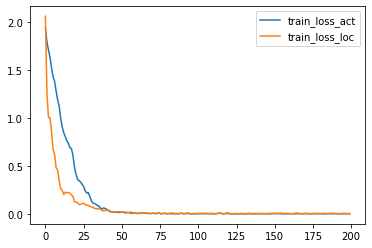

In [82]:
# train loss act vs loc
train_loss_act_df = pd.DataFrame(train_loss_act)
train_loss_act_df = train_loss_act_df.rename(columns={0:'train_loss_act'})
train_loss_loc_df = pd.DataFrame(train_loss_loc)
train_loss_loc_df = train_loss_loc_df.rename(columns={0:'train_loss_loc'})
pd.concat([train_loss_act_df,train_loss_loc_df], axis=1).plot()

<AxesSubplot:>

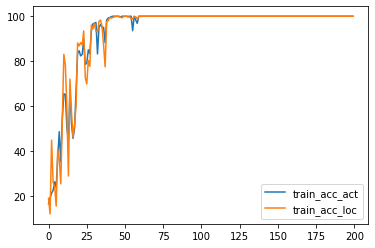

In [83]:
# train acc act vs loc
train_acc_act_df = pd.DataFrame(train_acc_act)
train_acc_act_df = train_acc_act_df.rename(columns={0:'train_acc_act'})
train_acc_loc_df = pd.DataFrame(train_acc_loc)
train_acc_loc_df = train_acc_loc_df.rename(columns={0:'train_acc_loc'})
pd.concat([train_acc_act_df,train_acc_loc_df], axis=1).plot()

<AxesSubplot:>

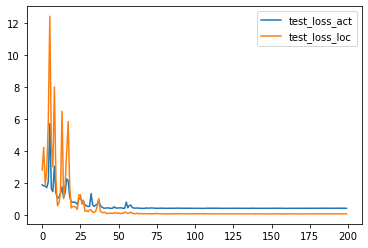

In [84]:
# test loss act vs loc
test_loss_act_df = pd.DataFrame(test_loss_act)
test_loss_act_df = test_loss_act_df.rename(columns={0:'test_loss_act'})
test_loss_loc_df = pd.DataFrame(test_loss_loc)
test_loss_loc_df = test_loss_loc_df.rename(columns={0:'test_loss_loc'})
pd.concat([test_loss_act_df,test_loss_loc_df], axis=1).plot()

<AxesSubplot:>

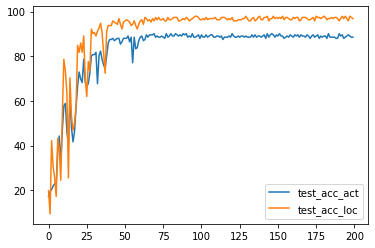

In [85]:
# test acc act vs loc
test_acc_act_df = pd.DataFrame(test_acc_act)
test_acc_act_df = test_acc_act_df.rename(columns={0:'test_acc_act'})
test_acc_loc_df = pd.DataFrame(test_acc_loc)
test_acc_loc_df = test_acc_loc_df.rename(columns={0:'test_acc_loc'})
pd.concat([test_acc_act_df,test_acc_loc_df], axis=1).plot()

In [86]:
resnet_df = pd.concat([train_loss_act_df,train_loss_loc_df,train_acc_act_df,train_acc_loc_df,test_loss_act_df,test_loss_loc_df,test_acc_act_df,test_acc_loc_df], axis=1)

In [87]:
resnet_df

,train_loss_act,train_loss_loc,train_acc_act,train_acc_loc,test_loss_act,test_loss_loc,test_acc_act,test_acc_loc
0,1.939374,2.063436,16.732673,19.108911,1.886625,2.804619,17.187500,19.791667
1,1.794703,1.259842,19.306931,12.178218,1.817001,4.230514,19.270833,9.375000
2,1.711397,1.009163,21.386139,44.950495,1.805400,1.883145,20.312500,42.187500
3,1.637413,1.007424,22.673267,26.138614,1.708712,2.822200,21.875000,30.729167
4,1.526672,0.859498,26.435644,24.356436,2.077803,5.814908,22.916667,25.520833
...,...,...,...,...,...,...,...,...
195,0.006783,0.008473,100.000000,100.000000,0.413038,0.067307,89.062500,96.875000
196,0.008351,0.009991,100.000000,100.000000,0.413299,0.068041,89.583333,95.833333
197,0.007103,0.008746,100.000000,100.000000,0.417463,0.064790,89.062500,97.916667
198,0.006775,0.008799,100.000000,100.000000,0.418285,0.064709,88.541667,97.395833
